# 8장. 텍스트빈도분석 - 2) 한글 단어 분석 

In [45]:
!pip install KoNLPy

## 한글 단어 분석을 위한 패키지 준비

In [46]:
import pandas as pd
import json
import re
import glob

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import re

# 1. 데이터 준비

In [47]:
# 관련 데이터 (엑셀파일) 불러오기
all_files = glob.glob('./myCabinetExcelKoData*.xls')

all_files 

['./myCabinetExcelKoData (7).xls',
 './myCabinetExcelKoData (6).xls',
 './myCabinetExcelKoData (5).xls',
 './myCabinetExcelKoData (9).xls',
 './myCabinetExcelKoData (8).xls']

In [48]:
all_files_data = [] #저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,「Parametric power Transformer」의 作動特性에 관한 硏究[Ⅰ]...,張正秀,慶北工業專門大學,1983
1,NaN,2,무인 감시 Transformer = Visual Surveillance Transf...,최경훈,제어·로봇·시스템학회,2021
2,NaN,3,Temporal Fusion Transformers와 심층 학습 방법을사용한 다층 ...,김인경,한국정보처리학회,2022
3,NaN,4,GITr(Gas Insulated Transformer)내부에 발생되는 PD 신호의...,정승용,대한전기학회,2006
4,NaN,5,GITr(Gas Insulated Transformer)내부에 발생되는 PD 신호의...,鄭承庸(Seung-yong Jung),대한전기학회,2006
...,...,...,...,...,...,...
94,NaN,95,Rogowski Coil과 Current Transformer의 직렬 아크 사고 측...,조찬기(Chan-Gi Cho),한국조명·전기설비학회,2020
95,NaN,96,PDDL to LTL Description Translation for Collec...,J. Y. Moon,제어로봇시스템학회,2020
96,NaN,97,方形波 pulse 入力에 對한 Transformer의 應答特性에 關한 硏究,鄭元一,大田工業專門學校,1977
97,NaN,98,CALCULATION OF INDUCTANCES OF TRANSFORMER EQUI...,Chen Dongjun,전력전자학회,1998


In [49]:
# 데이터 파일 이어붙이기
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,「Parametric power Transformer」의 作動特性에 관한 硏究[Ⅰ]...,張正秀,慶北工業專門大學,1983
1,NaN,2,무인 감시 Transformer = Visual Surveillance Transf...,최경훈,제어·로봇·시스템학회,2021
2,NaN,3,Temporal Fusion Transformers와 심층 학습 방법을사용한 다층 ...,김인경,한국정보처리학회,2022
3,NaN,4,GITr(Gas Insulated Transformer)내부에 발생되는 PD 신호의...,정승용,대한전기학회,2006
4,NaN,5,GITr(Gas Insulated Transformer)내부에 발생되는 PD 신호의...,鄭承庸(Seung-yong Jung),대한전기학회,2006
...,...,...,...,...,...,...
494,NaN,96,지하철 변전실용 진공주형형 몰드변압기의 난연성 확인에 관한 연구 = A Study ...,정용기,한국조명전기설비학회,1998
495,NaN,97,임피던스 변환회로의 신호 전달특성(S<sub>21</sub>) 측정 방법 = Mea...,박웅희,한국정보통신학회,2019
496,NaN,98,전력용 변압기 초음파 측정시스템 적용 = Application of the Ultr...,권동진,대한전기학회,2005
497,NaN,99,소형화 및 슬림형에 적합한 평면 플라이백 변압기의최적 설계에 관한 연구 = A St...,나혜중,한국전기전자학회,2020


In [50]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_str = ''
# 논문 제목 1개마다 진행
for title in all_title:
    # 한글과 공백을 제외한 문자 제거
    title = re.sub('[^ㄱ-힗 ]+', '', title)
    # 복수의 공백 제거
    title = re.sub(' +', ' ', title)
    all_str = all_str + title
    
all_str

' 의 作動特性에 관한 硏究 무인 감시  와 심층 학습 방법을사용한 다층 수평 시계열 데이터 분석  내부에 발생되는 신호의 패턴분석을 위한 와 적용결과 비교  내부에 발생되는 신호의 패턴분석을 위한 와 적용결과 비교  출력단을 로 통합 설계한 고효율 용 전원시스템       기반의 번역문 사후 교정 원시문과 기계번역문 간 효과적 관계모델링을 통한 기반 번역문 자동 사후 교정  를 응용한 전류형 구동에 관한 연구  를 갖는 의 구동회로  를 이용한 고온 초전도 케이블의 층간 전류 등분배 방안  와 을 활용한 전이학습 효과 검증 연구 법률상담데이터 분류문제 적용  를 이용한 고온초전도 케이블의 층간 전류 등분배 방안  를 이용한 계통 혼잡처리 방안  의 동작해석  용 개발  의 노이즈 억제성능 분석  용 개발 사례 다중 인코더 기반 번역문 자동 사후 교정 모델의 디코더 구조 연구  를 위한 양방향 컨버터 최적 설계  의 特性에 關한 實驗的 考察 전철용 고주파 대전력 비정질 개발  내부에 발생되는 신호의 패턴분석을 위한 와 적용 결과 비교  의 다중권선 전류 불균형 현상 분석 출력 를 없앤 계통 혼잡처리를 위한 의 최적 위치 선정 권선구조에 따른 해석 여자전압의 파형에 따른 의 특성 초고압 의 장기 과전압 시험에 관한 연구 광원에 따른 광 의 출력특성 연구  에서의 측정 기술 연구  출력단을 로 통합 설계한 고효율 용 전원시스템와 딥러닝을 이용한 지수 변동성 추정 을 위한 기반 자세 추정 기법 네트워크를 이용한 음성신호 변환     기반 번역문 사후 교정 위협 탐지 및 교통량 예측을 위한 장기 시계열 데이터에서의 와 모델 성능 비교 를 이용한 항공사진에서 다중클래스 차량 검출  와 를 이용한 고효율 전류 모드 급 전력증폭기 설계       기반 한국어 음성인식 모델 모델을 이용한 채팅 사용자 식별를 이용한 이미지 캡션 생성와 을 이용한 딥러닝 기반 특허 맵 모델를 활용한 주가 예측 모형 모델을 이용한 감정 분석와 을 이용한 딥러닝 기반 특허 맵 모델 기반 한국어 채

### 품사 태깅 : 명사 추출

In [51]:
nlp = Okt()
message_N = nlp.nouns(all_str)
message_N   #출력하여 내용 확인

['의',
 '관',
 '무인',
 '감시',
 '심층',
 '학습',
 '방법',
 '사용',
 '층',
 '수평',
 '시계열',
 '데이터',
 '분석',
 '내부',
 '발생',
 '신호',
 '패턴',
 '분석',
 '위',
 '적용',
 '결과',
 '비교',
 '내부',
 '발생',
 '신호',
 '패턴',
 '분석',
 '위',
 '적용',
 '결과',
 '비교',
 '출력',
 '단',
 '로',
 '통합',
 '설계',
 '효율',
 '용',
 '전원',
 '시스템',
 '기반',
 '번역',
 '문',
 '사후',
 '교정',
 '원시',
 '문과',
 '기계번역',
 '문',
 '간',
 '효과',
 '관계',
 '모델링',
 '통한',
 '기반',
 '번역',
 '문',
 '자동',
 '사후',
 '교정',
 '를',
 '응용',
 '전류',
 '구동',
 '관',
 '연구',
 '를',
 '의',
 '회로',
 '를',
 '이용',
 '고온',
 '초전도',
 '케이블',
 '층',
 '전류',
 '등분배',
 '방안',
 '활용',
 '전이',
 '학습',
 '효과',
 '검증',
 '연구',
 '법률',
 '상담',
 '데이터',
 '분류',
 '문제',
 '적용',
 '를',
 '이용',
 '고온',
 '초전도',
 '케이블',
 '층',
 '전류',
 '등분배',
 '방안',
 '를',
 '이용',
 '계통',
 '혼잡',
 '처리',
 '방안',
 '의',
 '동작',
 '해석',
 '용',
 '개발',
 '의',
 '노이즈',
 '성능',
 '분석',
 '용',
 '개발',
 '사례',
 '다중',
 '인코더',
 '기반',
 '번역',
 '문',
 '자동',
 '사후',
 '교정',
 '모델',
 '디코더',
 '구조',
 '연구',
 '를',
 '위',
 '방향',
 '컨버터',
 '최적',
 '설계',
 '의',
 '전철',
 '용',
 '주파',
 '대전',
 '비정질',
 '개발',
 '내부',
 '발생',
 '신호

### 단어 빈도 탐색

In [52]:
count = Counter(message_N)

count   #출력하여 내용 확인

Counter({'의': 25,
         '관': 69,
         '무인': 1,
         '감시': 2,
         '심층': 1,
         '학습': 14,
         '방법': 18,
         '사용': 12,
         '층': 5,
         '수평': 1,
         '시계열': 3,
         '데이터': 6,
         '분석': 44,
         '내부': 4,
         '발생': 8,
         '신호': 16,
         '패턴': 4,
         '위': 58,
         '적용': 24,
         '결과': 4,
         '비교': 14,
         '출력': 9,
         '단': 2,
         '로': 3,
         '통합': 2,
         '설계': 50,
         '효율': 25,
         '용': 57,
         '전원': 9,
         '시스템': 27,
         '기반': 64,
         '번역': 6,
         '문': 6,
         '사후': 5,
         '교정': 7,
         '원시': 1,
         '문과': 1,
         '기계번역': 1,
         '간': 1,
         '효과': 6,
         '관계': 2,
         '모델링': 8,
         '통한': 5,
         '자동': 7,
         '를': 31,
         '응용': 7,
         '전류': 33,
         '구동': 12,
         '연구': 91,
         '회로': 18,
         '이용': 116,
         '고온': 6,
         '초전도': 9,
         '케이블': 2,
        

In [53]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

트랜스포머 : 192
변압기 : 144
이용 : 116
연구 : 91
특성 : 79
기반 : 64
설계 : 50
모델 : 48
분석 : 44
전류 : 33
시스템 : 27
효율 : 25
적용 : 24
컨버터 : 24
전력 : 24
개발 : 20
활용 : 19
해석 : 19
방법 : 18
회로 : 18
전압 : 18
기법 : 18
신호 : 16
권선 : 16
기적 : 15
학습 : 14
비교 : 14
성능 : 14
영향 : 13
디자인 : 13
절연 : 13
사용 : 12
구동 : 12
예측 : 12
임피던스 : 12
장치 : 12
공진 : 12
계통 : 11
동작 : 11
향상 : 11
변환기 : 11
대한 : 11
냉각 : 11
부하 : 11
몰드 : 11
다중 : 10
구조 : 10
측정 : 10
한국어 : 10
진단 : 10
출력 : 9
전원 : 9
초전도 : 9
인버터 : 9
펄스 : 9
평가 : 9
압전 : 9
알고리즘 : 9
발생 : 8
모델링 : 8
방안 : 8
분류 : 8
최적 : 8
주파 : 8
인식 : 8
중심 : 8
고려 : 8
자가 : 8
세라믹스 : 8
온도 : 8


### 히스토그램

In [54]:
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)

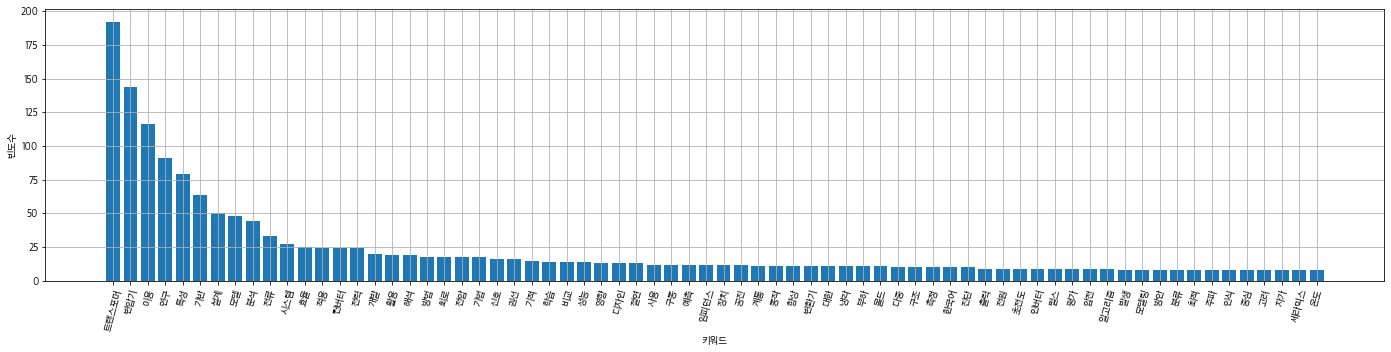

In [55]:
plt.figure(figsize=(24,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

### 워드클라우드

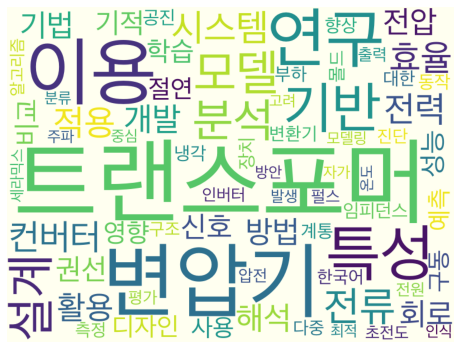

In [56]:
# 워드클라우드 생성
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

# 시각화
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [57]:
cloud.to_file('transformer_cloud_ko.jpg')